In [2]:
import pandas as pd 
import numpy as np
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ="af2697ff1adb4b4baa20e069e032c4dd" 
secret = "c27d4eb2db9945a0b1a4944f77519414" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

In [3]:
usr_id = "walshale?si=E3OL1EZQRwaZV7VGUdGtug"
me = sp.user(usr_id)

In [4]:
#https://open.spotify.com/playlist/37i9dQZF1DX2Nc3B70tvx0?si=Pq3TWKwHQ9ilOCz-MVlPNA
ultimate_indie_uri = "spotify:playlist:37i9dQZF1DX2Nc3B70tvx0"


In [5]:
ultimate_indie = sp.playlist(playlist_id=ultimate_indie_uri)
type(ultimate_indie)

dict

In [6]:
ultimate_indie["tracks"]['items'][2]['track']["available_markets"]

['CA', 'MX', 'US']

In [7]:
for i in range(len(ultimate_indie["tracks"]['items'])):
    try:
        del ultimate_indie["tracks"]['items'][i]['track']["available_markets"]
    except:
        print("not found in "+i)
        pass
    try: 
        del ultimate_indie["tracks"]['items'][i]['track']['album']["available_markets"]
    except:
        print("also not found in "+i)
        pass

In [8]:
ultimate_indie["tracks"]['items'][2]

{'added_at': '2020-05-15T08:01:00Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': '#af9d40',
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Ui2kfOqGujY81UcPrb5KE'},
     'href': 'https://api.spotify.com/v1/artists/4Ui2kfOqGujY81UcPrb5KE',
     'id': '4Ui2kfOqGujY81UcPrb5KE',
     'name': 'HAIM',
     'type': 'artist',
     'uri': 'spotify:artist:4Ui2kfOqGujY81UcPrb5KE'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/4veKZd8uf7TDVo1KQRVhuk'},
   'href': 'https://api.spotify.com/v1/albums/4veKZd8uf7TDVo1KQRVhuk',
   'id': '4veKZd8uf7TDVo1KQRVhuk',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b2734847cf25090d3ddabddfe83c',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn

In [9]:
#arist
ultimate_indie["tracks"]["items"][0]["track"]['artists'][0]["name"]

'Lianne La Havas'

In [10]:
#title
ultimate_indie["tracks"]["items"][0]["track"]["name"]

'Paper Thin'

In [11]:
#popularity
ultimate_indie["tracks"]["items"][0]["track"]["popularity"]

64

In [12]:
first_id = ultimate_indie["tracks"]["items"][0]["track"]["id"]

In [13]:
feats = sp.audio_features(first_id)[0]

In [14]:
ultimate_indie['tracks']['items'][1]["track"]["id"]

'1NGPZKzplieiPc5g6lAJ49'

In [15]:
def get_playlist_audioFeats(playlist_id):
    """
    Returns a pandas.df of all audio features within a playlist
    From spotify playlist uri
    """
    playlist = sp.playlist(playlist_id=playlist_id)['tracks']['items']
    ids = []
    song_attr = []
    for song in playlist:
        try:
            ids.append(song['track']['id'])
            title = song["track"]["name"]
            artist = song["track"]["artists"][0]['name']
            popularity = song["track"]["popularity"]
            songinfo = {"title":title,"artist":artist,"popularity":popularity}
            song_attr.append(songinfo)
        except TypeError:
            pass
        
    features = sp.audio_features(ids)
    for i in range(len(song_attr)):
        song_attr[i].update(features[i])
    
    df = pd.DataFrame(song_attr)
    drop_list = ["type","uri","track_href","analysis_url"]
    df.drop(drop_list,axis=1,inplace=True)
    return df

In [16]:
result = get_playlist_audioFeats(ultimate_indie_uri)

In [17]:
result[result['time_signature']==5]

,title,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
9,Dreamland,Glass Animals,69,0.253,0.352,8,-11.509,1,0.0357,0.883,0.00191,0.0668,0.099,141.97,5Bkw0lMhwk8tF4kMgCCJLv,203492,5


In [18]:
result.sort_values(by='danceability',axis=0,ascending=False)

,title,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
66,In My Room,Frank Ocean,75,0.861,0.647,7,-7.425,1,0.0675,0.5940,0.661000,0.1140,0.670,158.037,4S4Mfvv03M1cHgIOJcbUCL,133680,4
65,I disappear in your arms - bonus,Christine and the Queens,58,0.817,0.566,7,-6.928,1,0.0366,0.0471,0.026000,0.0816,0.372,119.991,7k9L8N0jZcz9qFupVeI4Va,236375,4
87,Karaoke,Ginger Root,40,0.802,0.786,11,-5.134,0,0.0335,0.2590,0.002280,0.1240,0.851,118.023,5vs3gwBqp1jJD82dZG8v4Z,237822,4
29,Hold It Together,The Marías,60,0.802,0.494,11,-10.099,0,0.0590,0.4280,0.103000,0.1070,0.518,82.014,6gJ2H930mAD1zRqmoFiE4W,222022,4
46,Funky Galileo,Sure Sure,56,0.802,0.325,10,-9.327,1,0.0466,0.1640,0.162000,0.1560,0.648,110.995,0TAHhMjG17P5pzlSm1sgSl,246200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Garden,Ambar Lucid,42,0.361,0.449,9,-8.962,0,0.0350,0.4210,0.000001,0.1040,0.240,149.626,5PF6ojt1ENjE53qWKjT2Kn,214970,4
6,PDLIF,Bon Iver,67,0.328,0.461,6,-8.790,1,0.0434,0.4470,0.000075,0.1550,0.232,126.015,6Md0VfGaWXZgJc53IMqPkO,177286,4
61,Music to Clean the House to,Nick Leng,43,0.320,0.485,1,-8.125,0,0.0306,0.0614,0.540000,0.1810,0.155,79.769,7doJTm33FOrVlGJVybeM5T,225733,4
52,peacefall,Purity Ring,22,0.267,0.637,7,-9.803,0,0.0424,0.2560,0.000037,0.2170,0.115,76.816,0u0i25AJrwbmfIDjgYsoA9,256733,4


In [19]:
import seaborn as sns

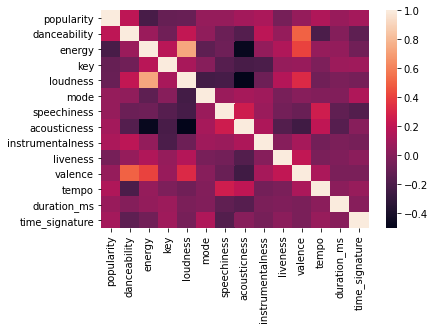

In [20]:
sns.heatmap(result.corr())

In [21]:
result.corrwith(result['popularity'],axis=0).sort_values(ascending=False)

popularity          1.000000
danceability        0.199232
tempo               0.142340
instrumentalness    0.133094
time_signature      0.111913
acousticness        0.101599
duration_ms         0.070716
valence             0.058571
speechiness         0.055684
mode                0.054089
liveness           -0.046921
loudness           -0.102851
key                -0.106442
energy             -0.219169
dtype: float64

In [46]:
## Get a bunch of data info from indie playlists

IndiePlaylists = [
    "spotify:playlist:37i9dQZF1DXdbXrPNafg9d",
    "spotify:playlist:37i9dQZF1DWWBHeXOYZf74",
    "spotify:playlist:37i9dQZF1DXcxvFzl58uP7",
    "spotify:playlist:37i9dQZF1DXcxvFzl58uP7",
    "spotify:playlist:37i9dQZF1DWWEcRhUVtL8n",
    "spotify:playlist:37i9dQZF1DX2sUQwD7tbmL",
    "spotify:playlist:37i9dQZF1DX59NCqCqJtoH",
    "spotify:playlist:37i9dQZF1DWYzpSJHStHHx",
    "spotify:playlist:37i9dQZF1DXdQvOLqzNHSW",
    "spotify:playlist:37i9dQZF1DX873GaRGUmPl",
    "spotify:playlist:37i9dQZF1DX9LbdoYID5v7",
    "spotify:playlist:37i9dQZF1DXaLaoaQqrfyO",
    "spotify:playlist:37i9dQZF1DXdTCdwCKzXwo",
    "spotify:playlist:37i9dQZF1DX7HOk71GPfSw",
    "spotify:playlist:37i9dQZF1DX8gDIpdqp1XJ",
    "spotify:playlist:37i9dQZF1DX26DKvjp0s9M",
    "spotify:playlist:37i9dQZF1DXaLI8a395lse",
    "spotify:playlist:37i9dQZF1DX9B1hu73DioC",
    "spotify:playlist:37i9dQZF1DX1aTyQ3Z9nTc",
    "spotify:playlist:37i9dQZF1DWVV27DiNWxkR",
    "spotify:playlist:37i9dQZF1DX0YKekzl0blG",
    "spotify:playlist:37i9dQZF1DXa71eg5j9dKZ",
    "spotify:playlist:37i9dQZF1DX9myttyycIxA",
    "spotify:playlist:37i9dQZF1DX6ujZpAN0v9r",
    "spotify:playlist:37i9dQZF1DXb67OkZ6150Z"
]


In [47]:
HipHopPlaylists = [
    'spotify:playlist:37i9dQZF1DX0XUsuxWHRQd',
    'spotify:playlist:37i9dQZF1DX2RxBh64BHjQ',
    'spotify:playlist:37i9dQZF1DX6GwdWRQMQpq',
    'spotify:playlist:37i9dQZF1DX2A29LI7xHn1',
    'spotify:playlist:37i9dQZF1DX7Mq3mO5SSDc',
    'spotify:playlist:37i9dQZF1DWY4xHQp97fN6',
    'spotify:playlist:37i9dQZF1DX186v583rmzp',
    'spotify:playlist:37i9dQZF1DWT5MrZnPU1zD',
    'spotify:playlist:37i9dQZF1DX6xZZEgC9Ubl',
    'spotify:playlist:37i9dQZF1DX0HRj9P7NxeE',
    'spotify:playlist:37i9dQZF1DX6OgmB2fwLGd',
    'spotify:playlist:37i9dQZF1DXaxIqwkEGFEh',
    'spotify:playlist:37i9dQZF1DX0Tkc6ltcBfU',
    'spotify:playlist:37i9dQZF1DX45xYefy6tIi',
    'spotify:playlist:37i9dQZF1DWVA1Gq4XHa6U',
    'spotify:playlist:37i9dQZF1DWVA1Gq4XHa6U',
    'spotify:playlist:37i9dQZF1DX2L0iB23Enbq',
    'spotify:playlist:37i9dQZF1DWX3387IZmjNa',
    'spotify:playlist:37i9dQZF1DX9sQDbOMReFI',
    'spotify:playlist:37i9dQZF1DXdWMJMjqz9bm',
    'spotify:playlist:37i9dQZF1DX91gZ5XTbTPm',
    'spotify:playlist:37i9dQZF1DWT6MhXz0jw61',
    'spotify:playlist:37i9dQZF1DWSvKsRPPnv5o',
    'spotify:playlist:37i9dQZF1DWVk7x1ClrO0Y',
    'spotify:playlist:37i9dQZF1DX1YPTAhwehsC',
    'spotify:playlist:37i9dQZF1DX2XmsXL2WBQd',
    'spotify:playlist:37i9dQZF1DWTggY0yqBxES',
    'spotify:playlist:37i9dQZF1DX5hR0J49CmXC',
    'spotify:playlist:37i9dQZF1DWSTeI2WWFaia',
    'spotify:playlist:37i9dQZF1DXcWxeqLvgOCi',
    'spotify:playlist:37i9dQZF1DX5jNEiuvPyWr',
    'spotify:playlist:37i9dQZF1DWXmxXDRgAKVq'
]

In [48]:
popPlaylist=[
    'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M',
    'spotify:playlist:37i9dQZF1DWUa8ZRTfalHk',
    'spotify:playlist:37i9dQZF1DWUa8ZRTfalHk',
    'spotify:playlist:37i9dQZF1DX5gQonLbZD9s',
    'spotify:playlist:37i9dQZF1DXbYM3nMM0oPk',
    'spotify:playlist:37i9dQZF1DX4JAvHpjipBk',
    'spotify:playlist:37i9dQZF1DWTwnEm1IYyoj',
    'spotify:playlist:37i9dQZF1DX0b1hHYQtJjp',
    'spotify:playlist:37i9dQZF1DWWvvyNmW9V9a',
    'spotify:playlist:37i9dQZF1DX0s5kDXi1oC5',
    'spotify:playlist:37i9dQZF1DWYs83FtTMQFw',
    'spotify:playlist:37i9dQZF1DX4pUKG1kS0Ac',
    'spotify:playlist:37i9dQZF1DWXti3N4Wp5xy',
    'spotify:playlist:37i9dQZF1DX6OgmB2fwLGd',
    'spotify:playlist:37i9dQZF1DXcxvFzl58uP7',
    'spotify:playlist:37i9dQZF1DXdwmD5Q7Gxah',
    'spotify:playlist:37i9dQZF1DX9vJ2U3sN7xj',
    'spotify:playlist:37i9dQZF1DWWEcRhUVtL8n',
    'spotify:playlist:37i9dQZF1DX5CdVP4rz81C',
    'spotify:playlist:37i9dQZF1DXaPCIWxzZwR1',
    'spotify:playlist:37i9dQZF1DX0MLFaUdXnjA',
    'spotify:playlist:37i9dQZF1DX3WvGXE8FqYX',
    'spotify:playlist:37i9dQZF1DX2L0iB23Enbq',
    'spotify:playlist:37i9dQZF1DWZQaaqNMbbXa',
    'spotify:playlist:37i9dQZF1DX4VvfRBFClxm',
    'spotify:playlist:37i9dQZF1DX7HOk71GPfSw',
]

In [52]:
edmPlaylists = [
    'spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n',
    'spotify:playlist:37i9dQZF1DXa8NOEUWPn9W',
    'spotify:playlist:37i9dQZF1DWSf2RDTDayIx',
    'spotify:playlist:37i9dQZF1DX0BcQWzuB7ZO',
    'spotify:playlist:37i9dQZF1DX0hvSv9Rf41p',
    'spotify:playlist:37i9dQZF1DWXLeA8Omikj7',
    'spotify:playlist:37i9dQZF1DX4eRPd9frC1m',
    'spotify:playlist:37i9dQZF1DX6VdMW310YC7',
    'spotify:playlist:37i9dQZF1DX32NsLKyzScr',
    'spotify:playlist:37i9dQZF1DXcZDD7cfEKhW',
    'spotify:playlist:37i9dQZF1DX2TRYkJECvfC',
    'spotify:playlist:37i9dQZF1DXaXB8fQg7xif',
    'spotify:playlist:37i9dQZF1DWSRc3WJklgBs',
    'spotify:playlist:37i9dQZF1DX6GJXiuZRisr',
    'spotify:playlist:37i9dQZF1DX8tZsk68tuDw'
]

In [50]:
def Scrape_Playlist_Data(playlists,genre):
    """
    Takes in a dictionary of playlist names as keys and uris as values
    returns dataframe of audio data on all playlists, 
    removes duplicate tracks
    """
    playlist_info = []
    for pl in playlists:
        playlist_info.append(get_playlist_audioFeats(pl))
        print(pl)
    df = pd.concat(playlist_info)
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    df.drop("index",axis=1,inplace=True)
    df['genre'] = pd.Series(genre, index=df.index)

    return df

In [53]:
dfi = Scrape_Playlist_Data(IndiePlaylists,'indie')
dfhh = Scrape_Playlist_Data(HipHopPlaylists,'hiphop')
dfp = Scrape_Playlist_Data(popPlaylist,'pop')
dfedm = Scrape_Playlist_Data(edmPlaylists,'edm')

spotify:playlist:37i9dQZF1DXdbXrPNafg9d
spotify:playlist:37i9dQZF1DWWBHeXOYZf74
spotify:playlist:37i9dQZF1DXcxvFzl58uP7
spotify:playlist:37i9dQZF1DXcxvFzl58uP7
spotify:playlist:37i9dQZF1DWWEcRhUVtL8n
spotify:playlist:37i9dQZF1DX2sUQwD7tbmL
spotify:playlist:37i9dQZF1DX59NCqCqJtoH
spotify:playlist:37i9dQZF1DWYzpSJHStHHx
spotify:playlist:37i9dQZF1DXdQvOLqzNHSW
spotify:playlist:37i9dQZF1DX873GaRGUmPl
spotify:playlist:37i9dQZF1DX9LbdoYID5v7
spotify:playlist:37i9dQZF1DXaLaoaQqrfyO
spotify:playlist:37i9dQZF1DXdTCdwCKzXwo
spotify:playlist:37i9dQZF1DX7HOk71GPfSw
spotify:playlist:37i9dQZF1DX8gDIpdqp1XJ
spotify:playlist:37i9dQZF1DX26DKvjp0s9M
spotify:playlist:37i9dQZF1DXaLI8a395lse
spotify:playlist:37i9dQZF1DX9B1hu73DioC
spotify:playlist:37i9dQZF1DX1aTyQ3Z9nTc
spotify:playlist:37i9dQZF1DWVV27DiNWxkR
spotify:playlist:37i9dQZF1DX0YKekzl0blG
spotify:playlist:37i9dQZF1DXa71eg5j9dKZ
spotify:playlist:37i9dQZF1DX9myttyycIxA
spotify:playlist:37i9dQZF1DX6ujZpAN0v9r
spotify:playlist:37i9dQZF1DXb67OkZ6150Z


In [54]:
df_list = [dfi,dfhh,dfp,dfedm]
fdf = pd.concat(df_list)

In [56]:
fdf[fdf['artist']=='Kendrick Lamar']

,title,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
891,Growing Apart (To Get Closer),Kendrick Lamar,51,0.586,0.533,8,-9.943,0,0.366,0.368,0.0,0.175,0.59,106.835,2AyFYSaJjz9XMc0kMr1R3a,220995,5,hiphop


In [57]:
dfhh

,title,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
0,Flex (feat. Juice WRLD),Polo G,84,0.752,0.673,10,-5.792,0,0.1530,0.05380,0.000000,0.1330,0.3500,164.009,2QqJTIlGKRLJC3onkavYEz,163902,4,hiphop
1,Party Girl,StaySolidRocky,91,0.728,0.431,6,-9.966,0,0.0622,0.74900,0.000000,0.0996,0.6290,130.022,5RqR4ZCCKJDcBLIn4sih9l,147800,4,hiphop
2,DOLLAZ ON MY HEAD (feat. Young Thug),Gunna,81,0.825,0.458,0,-7.470,1,0.0577,0.11400,0.000000,0.1020,0.1610,145.115,3nS9a01VvXHQriLqJYwRqG,197760,4,hiphop
3,ROCKSTAR (feat. Roddy Ricch),DaBaby,98,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.4970,89.977,7ytR5pFWmSjzHJIeQkgog4,181733,4,hiphop
4,Walk Em Down (feat. Roddy Ricch),NLE Choppa,89,0.867,0.744,9,-5.171,0,0.2280,0.26800,0.000000,0.0713,0.6450,84.005,4cSSL3YafYjM3yjgFO1vJg,173288,4,hiphop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,Pups (feat. A$AP Rocky),A$AP Ferg,0,0.520,0.742,1,-5.488,0,0.3590,0.00766,0.000000,0.4140,0.4380,117.864,4qqFsDCGpuIBMiMxjJB8w4,148733,5,hiphop
1626,Pistol Pete,Billz Raw,38,0.902,0.474,9,-5.227,1,0.1220,0.22300,0.000129,0.1400,0.0811,109.971,1LdS21yZTO99iKADCvw9Nb,200727,4,hiphop
1627,Let It Go,Playboi Carti,62,0.685,0.530,11,-5.298,1,0.2860,0.00360,0.000000,0.5730,0.5500,157.012,23QyE9GQpXsX9WgEDADMa6,150410,4,hiphop
1628,Nasty's World (feat. A$AP Nast & Onyx),A$AP Mob,46,0.665,0.612,10,-7.140,0,0.4960,0.08960,0.000000,0.2200,0.3000,84.005,2fCoq1wZzsa18L8mD33iuM,238840,4,hiphop


In [58]:
fdf.to_csv('playlist_w_genres.csv')